## Load original labels:

In [23]:
import json
import yaml

with open('labels_original_idaho', 'r') as fout:    
    #training_labels = json.load(fout)
    training_labels = yaml.safe_load(fout)
    print(len(training_labels))
    for key in training_labels[0].keys():
        print(key)
print(training_labels[0])

78420
height
width
category_id
image_name
bbox
{'height': '747', 'width': '1024', 'category_id': 19, 'image_name': '5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg', 'bbox': [249.6, 355.84, 176.64000000000001, 99.83999999999997]}


# Draw data analysis before augmantation:

In [2]:
import json
import yaml
import numpy as np
import matplotlib.pyplot as plt

counters = np.zeros((23,1))
with open('labels_original_idaho', 'r') as fout:    
    #training_labels = json.load(fout)
    training_labels = yaml.safe_load(fout)
    for i in range(len(training_labels)):
        if training_labels[i]['category_id'] == 1:
            counters[1] += 1
        if training_labels[i]['category_id'] == 2:
            counters[2] += 1
        if training_labels[i]['category_id'] == 3:
            counters[3] += 1
        if training_labels[i]['category_id'] == 4:
            counters[4] += 1
        if training_labels[i]['category_id'] == 5:
            counters[5] += 1
        if training_labels[i]['category_id'] == 6:
            counters[6] += 1
        if training_labels[i]['category_id'] == 7:
            counters[7] += 1
        if training_labels[i]['category_id'] == 8:
            counters[8] += 1
        if training_labels[i]['category_id'] == 9:
            counters[9] += 1
        if training_labels[i]['category_id'] == 10:
            counters[10] += 1
        if training_labels[i]['category_id'] == 11:
            counters[11] += 1
        if training_labels[i]['category_id'] == 12:
            counters[12] += 1
        if training_labels[i]['category_id'] == 13:
            counters[13] += 1
        if training_labels[i]['category_id'] == 14:
            counters[14] += 1
        if training_labels[i]['category_id'] == 15:
            counters[15] += 1
        if training_labels[i]['category_id'] == 16:
            counters[16] += 1
        if training_labels[i]['category_id'] == 17:
            counters[17] += 1
        if training_labels[i]['category_id'] == 18:
            counters[18] += 1
        if training_labels[i]['category_id'] == 19:
            counters[19] += 1
        if training_labels[i]['category_id'] == 20:
            counters[20] += 1
        if training_labels[i]['category_id'] == 21:
            counters[21] += 1
        if training_labels[i]['category_id'] == 22:
            counters[22] += 1
    for i in range(22):
        print("num of category_id " + str(i+1) + " = ",counters[i+1])
    x = np.arange(1,23)        
    plt.bar(x, height= [counters[1][0],counters[2][0],counters[3][0],counters[4][0],counters[5][0],counters[6][0],
                       counters[7][0],counters[8][0],counters[9][0],counters[10][0],counters[11][0],counters[12][0],
                       counters[13][0],counters[14][0],counters[15][0],counters[16][0],counters[17][0],counters[18][0],
                       counters[19][0],counters[20][0],counters[12][0],counters[22][0]])


num of category_id 1 =  [10490.]
num of category_id 2 =  [20.]
num of category_id 3 =  [6934.]
num of category_id 4 =  [1927.]
num of category_id 5 =  [2314.]
num of category_id 6 =  [7.]
num of category_id 7 =  [391.]
num of category_id 8 =  [7915.]
num of category_id 9 =  [231.]
num of category_id 10 =  [2148.]
num of category_id 11 =  [8286.]
num of category_id 12 =  [663.]
num of category_id 13 =  [9275.]
num of category_id 14 =  [1821.]
num of category_id 15 =  [20.]
num of category_id 16 =  [6100.]
num of category_id 17 =  [4466.]
num of category_id 18 =  [2561.]
num of category_id 19 =  [12318.]
num of category_id 20 =  [296.]
num of category_id 21 =  [118.]
num of category_id 22 =  [119.]


10490.0


<BarContainer object of 22 artists>

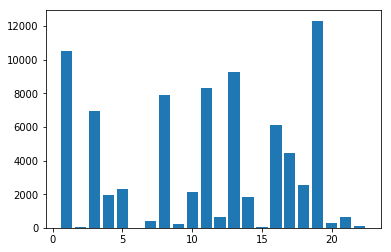

In [3]:
x = np.arange(1,23)
plt.bar(x, height= [counters[1][0],counters[2][0],counters[3][0],counters[4][0],counters[5][0],counters[6][0],
                       counters[7][0],counters[8][0],counters[9][0],counters[10][0],counters[11][0],counters[12][0],
                       counters[13][0],counters[14][0],counters[15][0],counters[16][0],counters[17][0],counters[18][0],
                       counters[19][0],counters[20][0],counters[12][0],counters[22][0]])

## Test Agumantetion:

In [24]:
import imgaug as ia
from iwild_augmentation import *

# read image
imag_num = 70000
images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
img = cv2.imread(images_path+'/'+training_labels[imag_num]['image_name'],1)
"""
cv2.rectangle(img,(int(training_labels[imag_num]['bbox'][0]),int(training_labels[imag_num]['bbox'][1])),
              (int(training_labels[imag_num]['bbox'][0]+training_labels[imag_num]['bbox'][2]),
               int(training_labels[imag_num]['bbox'][1]+training_labels[imag_num]['bbox'][3])),(0,255,0),3)
cv2.imwrite('original.jpg',img)
"""
box = [training_labels[imag_num]['bbox'][0],training_labels[imag_num]['bbox'][1],
      training_labels[imag_num]['bbox'][2],training_labels[imag_num]['bbox'][3]]
# start augmantetion
info = augmentation_handler_50(img, box)
for l in range(len(info)):
    cv2.imwrite('agu_'+'_'+str(l)+training_labels[imag_num]['image_name'],info[l]['image'])
    img = cv2.imread('agu_'+'_'+str(l)+training_labels[imag_num]['image_name'],1)
    cv2.rectangle(img,(int(list(info[l]['box'])[0]),int(list(info[l]['box'])[1])),
                  (int(list(info[l]['box'])[0]+list(info[l]['box'])[2]),
                   int(list(info[l]['box'])[1]+list(info[l]['box'])[3])),(0,255,0),3)
    cv2.imwrite('agu_'+str(l)+'.jpg',img)
print(int(list(info[l]['box'])[0]))

38


## Run Agumantetion (save images + add labels):

In [ ]:
import imgaug as ia
from iwild_augmentation import *

training_labels_aug = []
# read image
images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
for time in range(3):
    for i in range(len(training_labels)):
        print("1_",i)
        if training_labels[i]['category_id'] == 2 or training_labels[i]['category_id'] == 15:
            img = cv2.imread(images_path+'/'+training_labels[i]['image_name'],1)
            box = [training_labels[i]['bbox'][0],training_labels[i]['bbox'][1],
                  training_labels[i]['bbox'][2],training_labels[i]['bbox'][3]]
            # start augmantetion
            info = augmentation_handler_50(img, box)
            for l in range(len(info)):
                # save agumanted image
                cv2.imwrite(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],info[l]['image'])
                box_per_image = [int(list(info[l]['box'])[0]), int(list(info[l]['box'])[1]),
                                   int(list(info[l]['box'])[2]), int(list(info[l]['box'])[3])]
                img = cv2.imread(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],1)
                dict = {'image_name':'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],
                        'category_id':int(training_labels[i]['category_id']),
                        'bbox':box_per_image, 'width':str(img.shape[1]),
                        'height':str(img.shape[0])}
                training_labels_aug.append(dict)
             
for time in range(10):
    for i in range(len(training_labels)):
        print("2_",i)
        if training_labels[i]['category_id'] == 6:
            img = cv2.imread(images_path+'/'+training_labels[i]['image_name'],1)
            box = [training_labels[i]['bbox'][0],training_labels[i]['bbox'][1],
                  training_labels[i]['bbox'][2],training_labels[i]['bbox'][3]]
            # start augmantetion
            info = augmentation_handler_50(img, box)
            for l in range(len(info)):
                # save agumanted image
                cv2.imwrite(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],info[l]['image'])
                box = [int(list(info[l]['box'])[0]), int(list(info[l]['box'])[1]),
                       int(list(info[l]['box'])[2]), int(list(info[l]['box'])[3])]
                img = cv2.imread(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],1)
                dict = {'image_name':'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],
                        'category_id':int(training_labels[i]['category_id']),
                        'bbox':box, 'width':str(img.shape[1]),
                        'height':str(img.shape[0])}
                training_labels_aug.append(dict)
                
for time in range(1):
    for i in range(len(training_labels)):
        print("3_",i)
        if training_labels[i]['category_id'] == 7 or training_labels[i]['category_id'] == 9 or \
        training_labels[i]['category_id'] == 20:
            img = cv2.imread(images_path+'/'+training_labels[i]['image_name'],1)
            box = [training_labels[i]['bbox'][0],training_labels[i]['bbox'][1],
                  training_labels[i]['bbox'][2],training_labels[i]['bbox'][3]]
            # start augmantetion
            info = augmentation_handler_10(img, box)
            for l in range(len(info)):
                # save agumanted image
                cv2.imwrite(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],info[l]['image'])
                box = [int(list(info[l]['box'])[0]), int(list(info[l]['box'])[1]),
                       int(list(info[l]['box'])[2]), int(list(info[l]['box'])[3])]
                img = cv2.imread(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],1)
                dict = {'image_name':'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],
                        'category_id':int(training_labels[i]['category_id']),
                        'bbox':box, 'width':str(img.shape[1]),
                        'height':str(img.shape[0])}
                training_labels_aug.append(dict)
                
for time in range(3):
    for i in range(len(training_labels)):
        print("4_",i)
        if training_labels[i]['category_id'] == 21 or training_labels[i]['category_id'] == 22:
            img = cv2.imread(images_path+'/'+training_labels[i]['image_name'],1)
            box = [training_labels[i]['bbox'][0],training_labels[i]['bbox'][1],
                  training_labels[i]['bbox'][2],training_labels[i]['bbox'][3]]
            # start augmantetion
            info = augmentation_handler_10(img, box)
            for l in range(len(info)):
                # save agumanted image
                cv2.imwrite(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],info[l]['image'])
                box = [int(list(info[l]['box'])[0]), int(list(info[l]['box'])[1]),
                       int(list(info[l]['box'])[2]), int(list(info[l]['box'])[3])]
                img = cv2.imread(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],1)
                dict = {'image_name':'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],
                        'category_id':int(training_labels[i]['category_id']),
                        'bbox':box, 'width':str(img.shape[1]),
                        'height':str(img.shape[0])}
                training_labels_aug.append(dict)
       
for time in range(1):
    for i in range(len(training_labels)):
        print("5_",i)
        if training_labels[i]['category_id'] == 12:
            img = cv2.imread(images_path+'/'+training_labels[i]['image_name'],1)
            box = [training_labels[i]['bbox'][0],training_labels[i]['bbox'][1],
                  training_labels[i]['bbox'][2],training_labels[i]['bbox'][3]]
            # start augmantetion
            info = augmentation_handler_5(img, box)
            for l in range(len(info)):
                # save agumanted image
                cv2.imwrite(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],info[l]['image'])
                box = [int(list(info[l]['box'])[0]), int(list(info[l]['box'])[1]),
                       int(list(info[l]['box'])[2]), int(list(info[l]['box'])[3])]
                img = cv2.imread(images_path+'/'+'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],1)
                dict = {'image_name':'agu_'+str(time)+'_'+str(l)+training_labels[i]['image_name'],
                        'category_id':int(training_labels[i]['category_id']),
                        'bbox':box, 'width':str(img.shape[1]),
                        'height':str(img.shape[0])}
                training_labels_aug.append(dict)


In [49]:
print(training_labels_aug[5000])
print(training_labels[0])

{'height': '449', 'width': '800', 'category_id': 15, 'image_name': 'agu_2_0e8ef3fbe3e8c077781f150f4d8aa8ab6.jpg', 'bbox': [210, 235, 365, 294]}
{'height': '747', 'width': '1024', 'category_id': 19, 'image_name': '5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg', 'bbox': [249.6, 355.84, 176.64000000000001, 99.83999999999997]}


In [26]:
import os

images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
images_name = os.listdir(images_path)
print(len(images_name))
print(len(training_labels)+len(training_labels_aug))

111333
107525


In [27]:
# Saving Aug labels only
import json

with open('aug_labels_only', 'w') as fout:
    json.dump(training_labels_aug, fout)

In [28]:
imag_num = 500
images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
img = cv2.imread(images_path+'/'+training_labels_aug[imag_num]['image_name'],1)
cv2.rectangle(img,(int(training_labels_aug[imag_num]['bbox'][0]),int(training_labels_aug[imag_num]['bbox'][1])),
              (int(training_labels_aug[imag_num]['bbox'][0]+training_labels_aug[imag_num]['bbox'][2]),
               int(training_labels_aug[imag_num]['bbox'][1]+training_labels_aug[imag_num]['bbox'][3])),(0,255,0),3)

cv2.imwrite('test_aug.png',img)

True

In [ ]:
for i in range(len(training_labels_aug)):
    training_labels.append(training_labels_aug[i])

In [29]:
training_labels.extend(training_labels_aug)

In [30]:
import os

images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
images_name = os.listdir(images_path)
print(len(images_name))
print(len(training_labels))

111333
107525


In [18]:
import yaml
training_labels[0]
#yaml.safe_load(list_dump)

{u'bbox': [249.6, 355.84, 176.64000000000001, 99.83999999999997],
 u'category_id': 19,
 u'height': u'747',
 u'image_name': u'5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg',
 u'width': u'1024'}

In [32]:
import json

with open('my_labels_with_aug', 'w') as fout:
    json.dump(training_labels, fout)

num of category_id 1 =  [10490.]
num of category_id 2 =  [3020.]
num of category_id 3 =  [6934.]
num of category_id 4 =  [1927.]
num of category_id 5 =  [2314.]
num of category_id 6 =  [3507.]
num of category_id 7 =  [4301.]
num of category_id 8 =  [7915.]
num of category_id 9 =  [2541.]
num of category_id 10 =  [2148.]
num of category_id 11 =  [8286.]
num of category_id 12 =  [3978.]
num of category_id 13 =  [9275.]
num of category_id 14 =  [1821.]
num of category_id 15 =  [3020.]
num of category_id 16 =  [6100.]
num of category_id 17 =  [4466.]
num of category_id 18 =  [2561.]
num of category_id 19 =  [12318.]
num of category_id 20 =  [3256.]
num of category_id 21 =  [3658.]
num of category_id 22 =  [3689.]


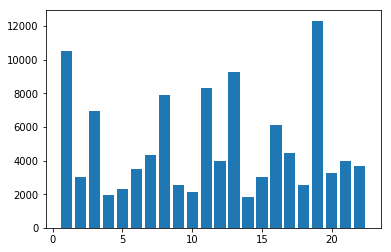

In [5]:
import json
import yaml
import numpy as np
import matplotlib.pyplot as plt

counters = np.zeros((23,1))
with open('my_labels_with_aug', 'r') as fout:    
    #training_labels = json.load(fout)
    training_labels = yaml.safe_load(fout)
    for i in range(len(training_labels)):
        if training_labels[i]['category_id'] == 1:
            counters[1] += 1
        if training_labels[i]['category_id'] == 2:
            counters[2] += 1
        if training_labels[i]['category_id'] == 3:
            counters[3] += 1
        if training_labels[i]['category_id'] == 4:
            counters[4] += 1
        if training_labels[i]['category_id'] == 5:
            counters[5] += 1
        if training_labels[i]['category_id'] == 6:
            counters[6] += 1
        if training_labels[i]['category_id'] == 7:
            counters[7] += 1
        if training_labels[i]['category_id'] == 8:
            counters[8] += 1
        if training_labels[i]['category_id'] == 9:
            counters[9] += 1
        if training_labels[i]['category_id'] == 10:
            counters[10] += 1
        if training_labels[i]['category_id'] == 11:
            counters[11] += 1
        if training_labels[i]['category_id'] == 12:
            counters[12] += 1
        if training_labels[i]['category_id'] == 13:
            counters[13] += 1
        if training_labels[i]['category_id'] == 14:
            counters[14] += 1
        if training_labels[i]['category_id'] == 15:
            counters[15] += 1
        if training_labels[i]['category_id'] == 16:
            counters[16] += 1
        if training_labels[i]['category_id'] == 17:
            counters[17] += 1
        if training_labels[i]['category_id'] == 18:
            counters[18] += 1
        if training_labels[i]['category_id'] == 19:
            counters[19] += 1
        if training_labels[i]['category_id'] == 20:
            counters[20] += 1
        if training_labels[i]['category_id'] == 21:
            counters[21] += 1
        if training_labels[i]['category_id'] == 22:
            counters[22] += 1
    for i in range(22):
            print("num of category_id " + str(i+1) + " = ",counters[i+1])
    x = np.arange(1,23)        
    plt.bar(x, height= [counters[1][0],counters[2][0],counters[3][0],counters[4][0],counters[5][0],counters[6][0],
                       counters[7][0],counters[8][0],counters[9][0],counters[10][0],counters[11][0],counters[12][0],
                       counters[13][0],counters[14][0],counters[15][0],counters[16][0],counters[17][0],counters[18][0],
                       counters[19][0],counters[20][0],counters[12][0],counters[22][0]])

# Convert labels to YOLO format:

In [1]:
import yaml

with open('my_labels_with_aug', 'r') as fout:    
    training_labels = yaml.safe_load(fout)
    print(len(training_labels))
    for key in training_labels[0].keys():
        print(key)

107525
height
width
category_id
image_name
bbox


In [5]:
images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
f=open("train.txt", "a+")
val=open("val.txt", "a+")
train_count = 0
val_count = 0
for i in range(len(training_labels)):
    if training_labels[i]['bbox'][2]+training_labels[i]['bbox'][0] >= int(training_labels[i]['width'])-10:
        w = int(training_labels[i]['width']) - 5
    else:
        w = training_labels[i]['bbox'][2]+training_labels[i]['bbox'][0]
    if training_labels[i]['bbox'][3]+training_labels[i]['bbox'][1] >= int(training_labels[i]['height'])-10:
        h = int(training_labels[i]['height']) - 5
    else:
        h = training_labels[i]['bbox'][3]+training_labels[i]['bbox'][1]
    if training_labels[i]['bbox'][0] <= 0:
        training_labels[i]['bbox'][0] = 1
    if training_labels[i]['bbox'][1] <= 0:
        training_labels[i]['bbox'][1] = 1
    if training_labels[i]['bbox'][0] >= w or training_labels[i]['bbox'][1] >= h:
        continue
    if i % 9999999999999 == 0:
        val.write("%d %s %d %d %d %d %d\r\n" %(val_count ,(images_path+'/'+training_labels[i]['image_name']) ,
                                               training_labels[i]['category_id']-1 ,
                                               training_labels[i]['bbox'][0] ,
                                               training_labels[i]['bbox'][1] ,
                                               w  , h))
        val_count += 1
    else:
        f.write("%d %s %d %d %d %d %d\r\n" %(train_count ,(images_path+'/'+training_labels[i]['image_name']) ,
                                                   training_labels[i]['category_id']-1 ,
                                                   training_labels[i]['bbox'][0] ,
                                                   training_labels[i]['bbox'][1] ,
                                                   w  , h))
        train_count += 1
    
    
f.close()

In [4]:
images_path = "/media/eslam/D0FCBC10FCBBEF3A/iwild_data/training_iamges/my_training_images"
f=open("train.txt", "a+")
val=open("test.txt", "a+")
train_count = 0
val_count = 0
for i in range(len(training_labels)):
    if training_labels[i]['bbox'][2]+training_labels[i]['bbox'][0] >= int(training_labels[i]['width'])-10:
        w = int(training_labels[i]['width']) - 11
    else:
        w = training_labels[i]['bbox'][2]+training_labels[i]['bbox'][0]
    if training_labels[i]['bbox'][3]+training_labels[i]['bbox'][1] >= int(training_labels[i]['height'])-10:
        h = int(training_labels[i]['height']) - 11
    else:
        h = training_labels[i]['bbox'][3]+training_labels[i]['bbox'][1]
    if training_labels[i]['bbox'][0] <= 5:
        training_labels[i]['bbox'][0] = 6
    if training_labels[i]['bbox'][1] <= 5:
        training_labels[i]['bbox'][1] = 6
    if i % 999999999999 == 0:
        val.write("%s %d,%d,%d,%d,%d\r\n" %((images_path+'/'+training_labels[i]['image_name']),
                                               training_labels[i]['bbox'][0] , training_labels[i]['bbox'][1],
                                               w, h, training_labels[i]['category_id']-1))
        val_count += 1
    else:
        f.write("%s %d,%d,%d,%d,%d\r\n" %((images_path+'/'+training_labels[i]['image_name']),
                                                   training_labels[i]['bbox'][0] , training_labels[i]['bbox'][1],
                                                   w  , h, training_labels[i]['category_id']-1 ))
        train_count += 1
    
    
f.close()